# 特征生成测试

## 1.导入各个模块

In [1]:
import sys 
sys.path.append('../src/') 
import pointcloud as pc 
import validpoint as vp 
import matplotlib.pyplot as plt 
import featuregenerate as fg
%matplotlib inline 

## ２.测试

In [2]:
tst=pc.PointCloud() # 实例化tst PointCloud类
tst.ReadFromBinFile('../data/test.pcd') # 调用方法读取pcd文件
vldpc=vp.ValidPoints(tst,640,640,5,-5,60) # 实例化vldpc类
vldpc.GetValid() # 调用GetValid方法获取ROI点云数据
fgg=fg.FeatureGenerator() # 实例化fgg FeatureGenerator类
outblob=fgg.Generate(vldpc) # 调用方法Generate 提取各个通道特征，返回numpy.array()类
print(outblob.shape)

(1, 8, 640, 640)


## 3.图示各个通道

### 3.1 单元格最大高度和平均高度

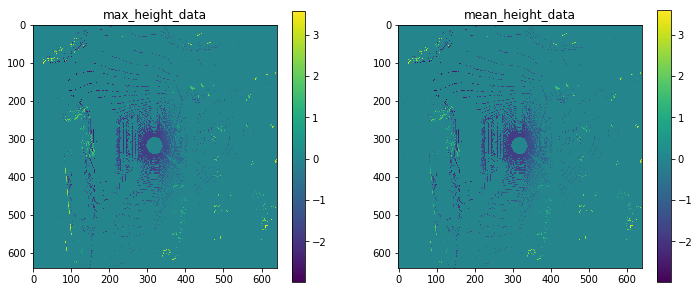

In [3]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(outblob[0,0])
plt.title("max_height_data")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(outblob[0,1])
plt.title("mean_height_data")
plt.colorbar()

### 3.2 相对原点距离和方向角

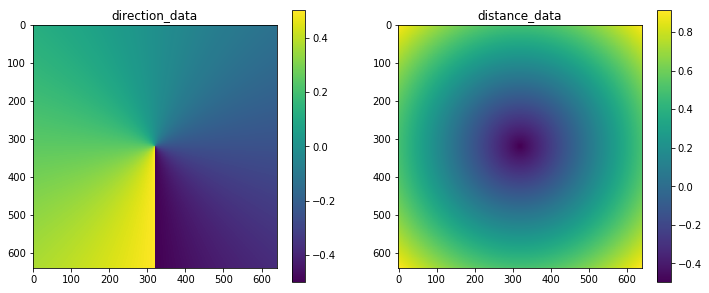

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(outblob[0,3])
plt.title("direction_data")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(outblob[0,6])
plt.title("distance_data")
plt.colorbar()

### 3.3 单元格最大反射强度与平均强度

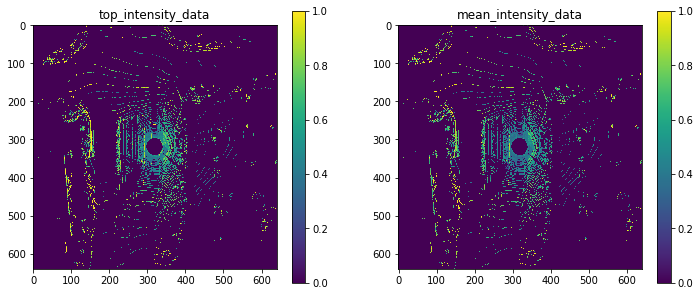

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(outblob[0,4])
plt.title("top_intensity_data")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(outblob[0,5])
plt.title("mean_intensity_data")
plt.colorbar()

### 3.4 单元格点数与掩码

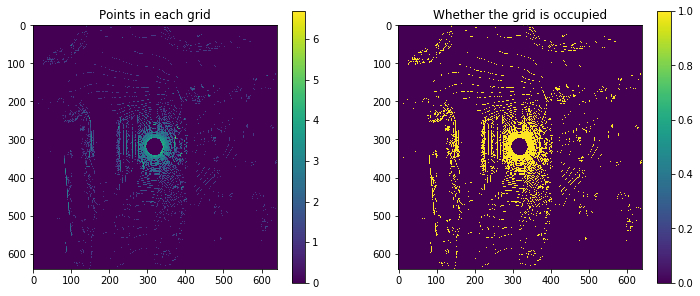

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(outblob[0,2])
plt.title("Points in each grid")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(outblob[0,7])
plt.title("Whether the grid is occupied")
plt.colorbar()